<a href="https://colab.research.google.com/github/Hyeok127/JSH/blob/main/efficientnetB2_D_no_OP_RMSprop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#구글 드라이브를 코랩 서버에 붙힐 것이다. >> 마운트 하는 과정
# 코드 스니펫

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!ls -al /gdrive/MyDrive/tmp/glaucoma.zip

-rw------- 1 root root 124001785 Jan 18 07:28 /gdrive/MyDrive/tmp/glaucoma.zip


In [ ]:
!cp /gdrive/MyDrive/tmp/glaucoma.zip ./
#이 파일을 구글에서 카피해 오는 것이다.

In [ ]:
!ls -al #잘 카피가 되었는지 확인하는 과정

total 121112
drwxr-xr-x 1 root root      4096 Jan 21 08:13 .
drwxr-xr-x 1 root root      4096 Jan 21 08:13 ..
drwxr-xr-x 4 root root      4096 Jan  7 14:33 .config
-rw------- 1 root root 124001785 Jan 21 08:13 glaucoma.zip
drwxr-xr-x 1 root root      4096 Jan  7 14:33 sample_data


In [ ]:
!unzip glaucoma.zip

Archive:  glaucoma.zip
   creating: glaucoma/test/
   creating: glaucoma/test/advanced/
  inflating: glaucoma/test/advanced/1.png  
  inflating: glaucoma/test/advanced/10.png  
  inflating: glaucoma/test/advanced/11.png  
  inflating: glaucoma/test/advanced/12.png  
  inflating: glaucoma/test/advanced/13.png  
  inflating: glaucoma/test/advanced/14.png  
  inflating: glaucoma/test/advanced/15.png  
  inflating: glaucoma/test/advanced/16.png  
  inflating: glaucoma/test/advanced/17.png  
  inflating: glaucoma/test/advanced/18.png  
  inflating: glaucoma/test/advanced/19.png  
  inflating: glaucoma/test/advanced/2.png  
  inflating: glaucoma/test/advanced/20.png  
  inflating: glaucoma/test/advanced/21.png  
  inflating: glaucoma/test/advanced/22.png  
  inflating: glaucoma/test/advanced/23.png  
  inflating: glaucoma/test/advanced/24.png  
  inflating: glaucoma/test/advanced/25.png  
  inflating: glaucoma/test/advanced/26.png  
  inflating: glaucoma/test/advanced/27.png  
  inflating: g

31801344/31790344 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 7, 7, 1408)       7768569   
                                                                 
 flatten (Flatten)           (None, 68992)             0         
                                                                 
 dense (Dense)               (None, 256)               17662208  
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 25,432,572
Trainable params: 17,663,491
Non

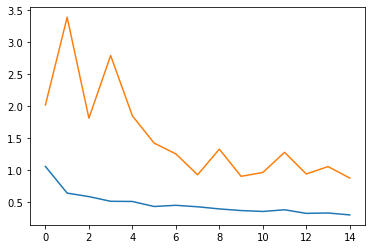

3/3 [==============================] - 1s 180ms/step - loss: 0.8765 - accuracy: 0.7237
loss= 0.8765348196029663
acc= 0.7236841917037964


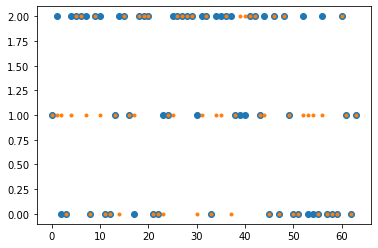

label category index = 1.0
predicted category index = 1
predicted category name = early


In [ ]:
#고칠곳이 3군데 normal early advanced 파일이므로

import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False
# conv_layers.trainable = True

model = keras.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))  #<<<--- 여기 수정함

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['accuracy'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,                  # 이미지를 읽어와서 약간씩 찌그러트린다. 일부러 해주는 과정
      preprocessing_function=preprocessor   #사실 지정안해줘도 상관없는 부분
).flow_from_directory(
      "glaucoma/train",              # <-------------수정된 부분임
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'                     # 데이터가 디렉토리 안에있다 그것을 가져와서 학습한다. 
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",            # < ------------- 수정된 부분임
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=test_data_generator,
      epochs=15
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


In [ ]:
conv_layers.summary()

Model: "efficientnetb2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                     

efficientnet architecture를 참고하면 이해하는데 도움이 된다.